In [1]:
# Importing required library functions

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

      

In [2]:
# Description of  data set

boston=load_boston()
print(boston.DESCR)
      

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Keeping data into panda dataframes

features = pd.DataFrame(boston.data,columns = boston.feature_names)



In [5]:
features["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [6]:
features["CRIM"]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [7]:
# Standardizing target variable

target=pd.DataFrame(boston.target,columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [8]:
min(target["target"])

5.0

In [9]:
max(target["target"])

50.0

In [10]:
# Concatinating features and target  

df=pd.concat([features,target],axis=1)
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0




df.describe().round(decimals=2)


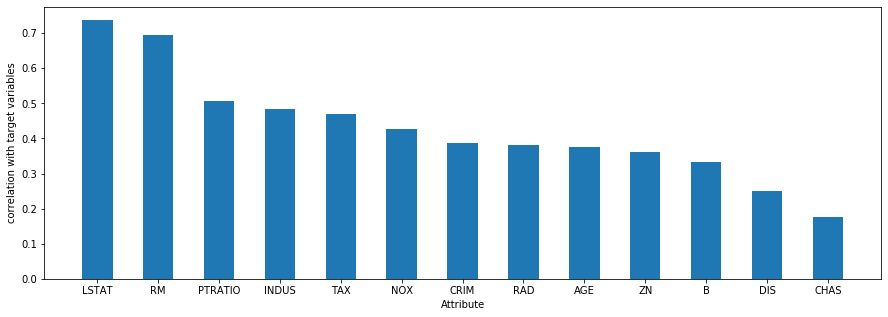

In [11]:
#  Stage 1: CORRELATION


# correlation between every feature with target values


corr = df.corr('pearson')

corrs=[abs(corr[attr]['target'])   for attr in list(features)]

l= list(zip(corrs,list(features)))

l.sort(key=lambda x: x[0] , reverse= True )

corrs,labels =list(zip(*l))


index=np.arange(len(labels))

plt.figure(figsize=(15,5))

plt.bar(index,corrs,width=0.5)

plt.xlabel('Attribute')
plt.ylabel('correlation with target variables')

plt.xticks(index,labels)

plt.show()


In [12]:
print(list(features))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [13]:
#  Normalization


X=df['LSTAT'].values
Y=df['target'].values


In [14]:
print(Y[:5])



[24.  21.6 34.7 33.4 36.2]


In [15]:
# Stage 2: Splitting the data 

x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]

y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]


In [16]:
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)


In [18]:
#step:3
# Gradient Descent
# update function

def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m- grad_m * learning_rate
    c = c- grad_c * learning_rate
    return m,c


In [19]:
# Error function

def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)



In [23]:
# Gradient Descent function

def gradient_descent(init_m, init_c, x,t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e < error_threshold:
            print("Error lessthan threshold.Stooping GRADIENT DESCENT")
            break
        error_values.append(e)  
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

    
    



In [24]:
%%time

init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001
m,c,error_values,mc_values= gradient_descent(init_m, init_c, xtrain ,ytrain , learning_rate, iterations, error_threshold)




Wall time: 84.8 ms


In [25]:
#STEP:4

# MODEL VISUALISATION



# Slicing m and c values

mc_values_anim=mc_values[0:250:5]


RuntimeError: Requested MovieWriter (ffmpeg) not available

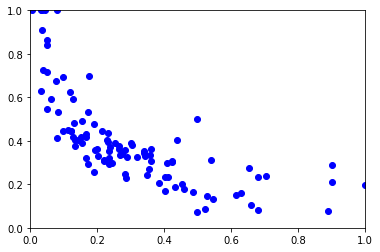

In [26]:
fig,ax=plt.subplots()
ln, = plt.plot([],[],'ro-',animated=True)


# Defining initial function

def init():
    plt.scatter(xtest,ytest,color="b")
    
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,


# Defining updated function

def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m*-0.5+c
    x2,y2=1.5,m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,


anim=FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video())
    


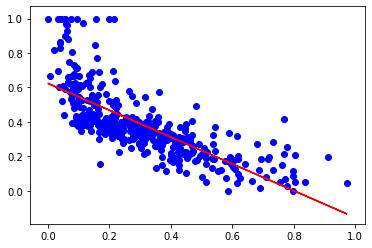

In [27]:
# VISUALISATION OF LEARNING PROCESS

# Plotting regression line

plt.scatter(xtrain,ytrain,color="b")
plt.plot(xtrain,(m*xtrain+c), color="r")





Text(0.5, 0, 'ITERATIONS')

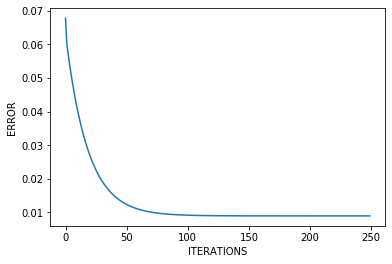

In [28]:
#Plotting Error values


plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel("ERROR")
plt.xlabel("ITERATIONS")

In [29]:
#STEP :5

#PREDICTION

#Calculating the prediction

predicted=(m*xtest) + c




In [30]:
#Calculating error

mean_squared_error(ytest,predicted)



0.02329359315571578

In [31]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=["x","y_target","predicted"])
p.head()

,x,y_target,predicted
0,0.235651,0.351111,0.439805
1,0.127759,0.415556,0.523887
2,0.043874,1.000000,0.589260
3,0.354857,0.268889,0.346907
4,0.290563,0.324444,0.397012


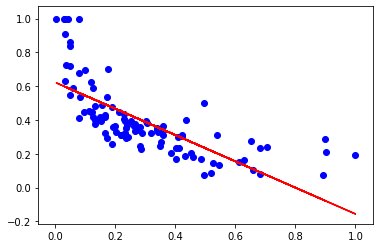

In [32]:
#Plotting predicted values against target values

plt.scatter(xtest,ytest,color="b")
plt.plot(xtest,predicted,color="r")


In [33]:


predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)


xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)



xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=["x","y_target","predicted_y"])
p=p.round(decimals=2)
p.head()



,x,y_target,predicted_y
0,10.27,20.8,24.79
1,6.36,23.7,28.57
2,3.32,50.0,31.52
3,14.59,17.1,20.61
4,12.26,19.6,22.87
